In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Importing the data set
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test = test.drop("SalePrice", axis=1)
mean = train.mean()
std = train.std()
train = (train - mean) / std
test = (test - mean.drop("SalePrice")) / std.drop("SalePrice")

In [30]:
def gradient_descent(m_now, b_now, points, L, alpha):
    m_gradient = np.zeros(len(m_now))
    b_gradient = 0
    mse = 0
    cmse = 0
    n = len(points)
    
    for i in range(n):
        x = points.iloc[i][: -1].values
        y = points.iloc[i].SalePrice
        mse += (np.dot(m_now, x) + b_now - y) ** 2
        cmse = (mse * std.SalePrice + mean.SalePrice)
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))

    m_gradient += (np.dot(alpha,m_now)) / n
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    cmse /= n
    temp=pd.Series(cmse)
    return m, b, temp[0]


m = np.zeros(len(train.columns)-1)
b = 0
L = 0.0001
cmse = 0
alp = 5
epochs = 1100
hist = []
for i in range(epochs):
    if i % 50 == 0:
        print(f"Epoch: {i}")
        print(f"MSE: {cmse}")
    m, b, cmse = gradient_descent(m, b, train, L, alp)   
    hist.append(cmse)
print(m, b)

Epoch: 0
MSE: 0
Epoch: 50
MSE: 74204.59144310144
Epoch: 100
MSE: 68685.74538695374
Epoch: 150
MSE: 63525.230802253434
Epoch: 200
MSE: 58713.462504602154
Epoch: 250
MSE: 54241.07007973458
Epoch: 300
MSE: 50098.89337874168
Epoch: 350
MSE: 46277.97810507133
Epoch: 400
MSE: 42769.57149145908
Epoch: 450
MSE: 39565.11806498546
Epoch: 500
MSE: 36656.255498484476
Epoch: 550
MSE: 34034.81054656975
Epoch: 600
MSE: 31692.79506457768
Epoch: 650
MSE: 29622.402108756865
Epoch: 700
MSE: 27816.002116073996
Epoch: 750
MSE: 26266.139162031453
Epoch: 800
MSE: 24965.527294928947
Epoch: 850
MSE: 23907.046945030666
Epoch: 900
MSE: 23083.741407130266
Epoch: 950
MSE: 22488.813395036683
Epoch: 1000
MSE: 22115.621666533338
Epoch: 1050
MSE: 21957.67771739102
[0.15534162 0.13967163 0.12699939 0.1269146  0.12006027 0.11908068
 0.11057531 0.10466371 0.1037532  0.09820999] [ 2.64550741e-17  2.98081202e-17  2.95144192e-17  3.13214346e-17
  2.86417032e-17  3.32848542e-17  2.95112909e-17  3.05821600e-17
  1.78736901e-1

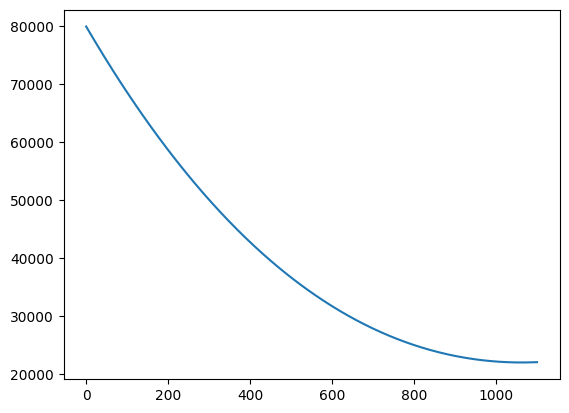


 Mean Squared Error: 22008.642543045215


In [33]:
prediction = [np.dot(m,x) + b for x in test.values]
real = test.iloc[:, -1].values
plt.plot(range(epochs), hist)
plt.show()
print (f"\n Mean Squared Error: {cmse}")